![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [3]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [4]:
# Celda 1.1
bikes.groupby('season').total.mean()

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: total, dtype: float64

In [5]:
# Celda 1.2
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

<font color='yellow'>Solución Punto 1.</font>

In [9]:
descriptivo = bikes[['season', 'hour']].describe()
print(descriptivo)

             season          hour
count  10886.000000  10886.000000
mean       2.506614     11.541613
std        1.116174      6.915838
min        1.000000      0.000000
25%        2.000000      6.000000
50%        3.000000     12.000000
75%        4.000000     18.000000
max        4.000000     23.000000


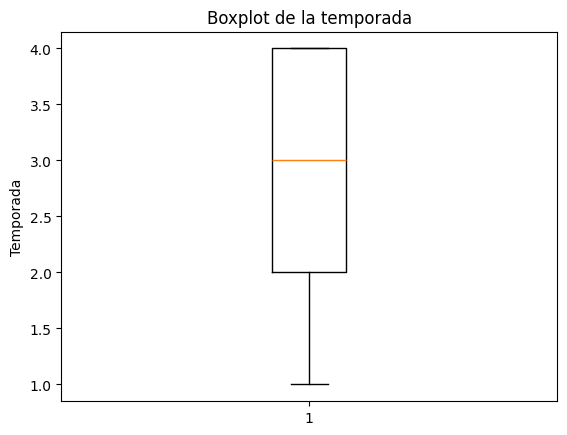

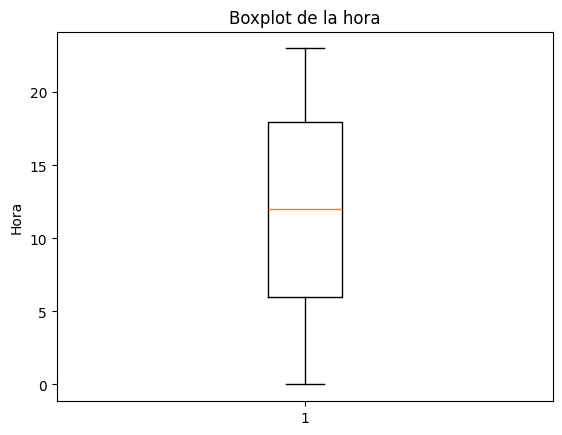

In [14]:
import matplotlib.pyplot as plt

plt.boxplot(bikes["season"])
plt.title("Boxplot de la temporada")
plt.ylabel("Temporada")
plt.show()

plt.boxplot(bikes["hour"])
plt.title("Boxplot de la hora")
plt.ylabel("Hora")
plt.show()

**Análisis.**

1. Season: 
- El conjunto de datos contiene información sobre un total de 10,886 observaciones de temporada.
- La media (promedio) de la temporada es aproximadamente 2.51. Esto indica que, en promedio, las observaciones están distribuidas entre las cuatro estaciones de manera relativamente uniforme.
- La desviación estándar de aproximadamente 1.12 indica que hay cierta variabilidad en los datos de temporada alrededor de la media.
- La temporada mínima es 1 (probablemente correspondiente a la primavera) y la temporada máxima es 4 (probablemente correspondiente al invierno).

2. Hour:

- El conjunto de datos contiene información sobre un total de 10,886 observaciones de hora.
- La media (promedio) de la hora es aproximadamente 11.54. Esto sugiere que la mayoría de las observaciones de la hora tienden a estar alrededor de las 11 o 12 de la mañana.
- La desviación estándar de aproximadamente 6.92 indica que hay una cantidad significativa de variabilidad en los datos de hora alrededor de la media.
- La hora mínima es 0 (probablemente correspondiente a la medianoche) y la hora máxima es 23 (probablemente correspondiente a las 11 de la noche).

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

<Axes: xlabel='hour'>

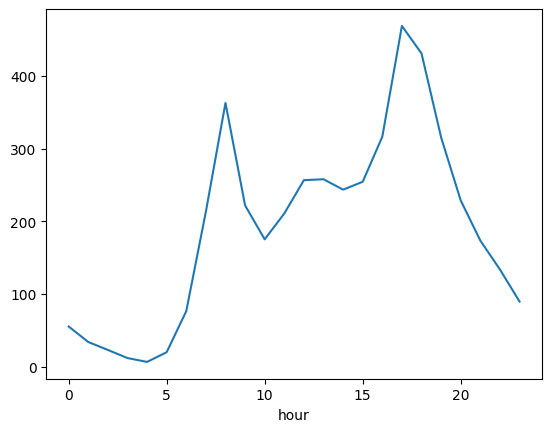

In [15]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

<font color='yellow'>Solución Punto 2.</font>

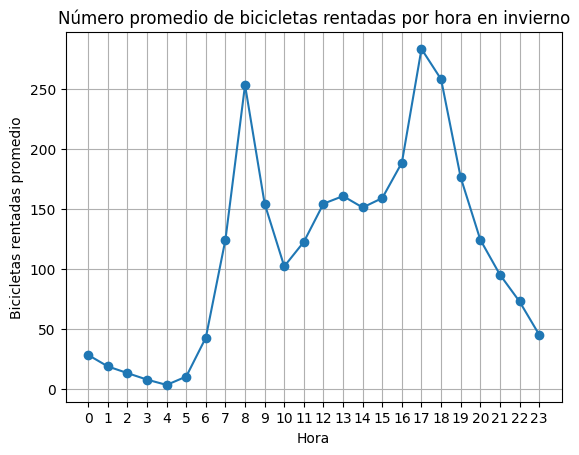

In [21]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos 

invierno = bikes[bikes["season"] == 1]
promedio_invierno = invierno.groupby("hour")["total"].mean()
plt.plot(promedio_invierno, marker='o')
plt.title("Número promedio de bicicletas rentadas por hora en invierno")
plt.xlabel("Hora")
plt.ylabel("Bicicletas rentadas promedio")
plt.xticks(range(24))
plt.grid(True)
plt.show()

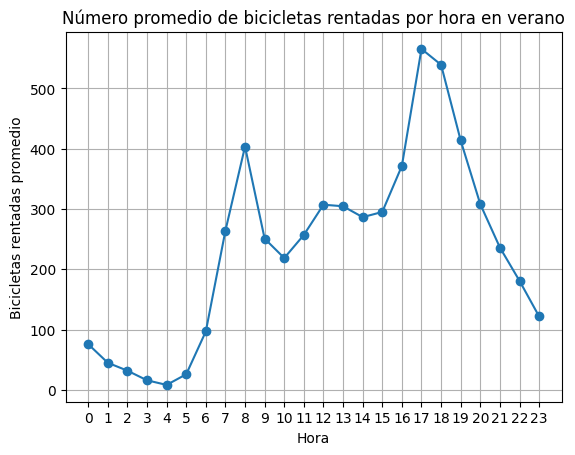

In [22]:
# Celda 2.3 - "season"=3 escriba su código y hallazgos 
verano = bikes[bikes["season"] == 3]
promedio_verano = verano.groupby("hour")["total"].mean()
plt.plot(promedio_verano, marker='o')
plt.title("Número promedio de bicicletas rentadas por hora en verano")
plt.xlabel("Hora")
plt.ylabel("Bicicletas rentadas promedio")
plt.xticks(range(24))
plt.grid(True)
plt.show()

**Análisis.**

Para ambos estados (Inviernos y Verano), los pormedios de renta son iguales, no obstante, los promedios muestran patrones distintivos en el número de bicicletas rentadas por hora a lo largo del día. Se observa un aumento durante las horas de la mañana, con picos notables alrededor de las 8:00 a.m. y las 9:00 a.m., lo que sugiere un posible uso para desplazamientos laborales o escolares. El número de bicicletas rentadas disminuye gradualmente durante el día, con mínimos alrededor de las 4:00 a.m. y picos nuevamente durante las horas de la tarde, particularmente alrededor de las 5:00 p.m. y las 6:00 p.m. Estos picos podrían indicar el regreso a casa después del trabajo o actividades recreativas. Además, se observa un descenso en el número de bicicletas rentadas a partir de las 7:00 p.m., con horas nocturnas de menor actividad. Es crucial considerar si estos patrones varían durante los días laborales y los fines de semana, lo que podría proporcionar información valiosa para la gestión de servicios de alquiler de bicicletas y la planificación de la movilidad urbana.

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

<font color='yellow'>Solución Punto 3.</font>

In [28]:
# Celda 3
from sklearn.model_selection import train_test_split
bikes_encoded = pd.get_dummies(bikes, columns=["season"], drop_first=True)

In [30]:
X = bikes_encoded[["hour", "season_2", "season_3", "season_4"]]
y = bikes_encoded["total"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

print("Coeficientes del modelo:")
print("Intercepto:", model.intercept_)
print("Coeficientes para hour, season_2, season_3, season_4:", model.coef_)

Coeficientes del modelo:
Intercepto: -5.9195473419623
Coeficientes para hour, season_2, season_3, season_4: [ 10.56961908  99.10667072 116.04634     84.944802  ]


**Análisis**

Al analizar los coeficientes del modelo de regresión lineal, encontramos que para cada hora adicional, se estima un aumento de aproximadamente 10.57 bicicletas alquiladas, manteniendo constante el efecto de la estacionalidad. Sin embargo, al profundizar en la interpretación de los coeficientes, surgen ciertas limitaciones de la regresión lineal en este contexto. Por un lado, la suposición de linealidad puede no capturar completamente las relaciones complejas entre las variables predictoras y la variable de respuesta. Además, la posible presencia de multicolinealidad entre las variables predictoras podría afectar la interpretación de los coeficientes. Aunque hemos incluido variables dummy para representar las diferentes estaciones, la regresión lineal podría no ser suficiente para capturar la variabilidad estacional de manera precisa. Además, la sensibilidad a valores atípicos en los datos podría influir en los resultados del modelo y su interpretación. En resumen, mientras que la regresión lineal proporciona un punto de partida útil para el análisis, es crucial considerar sus limitaciones y explorar modelos más complejos si las suposiciones de la regresión lineal no se cumplen plenamente.

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

<font color='yellow'>Solución Punto 4.</font>

In [33]:
# Celda 4
def split_data(hour, season):
    return bikes[(bikes["hour"] <= hour) & (bikes["season"] <= season)], bikes[(bikes["hour"] > hour) & (bikes["season"] > season)]

class Node:
    def __init__(self, prediction):
        self.prediction = prediction
        self.left = None
        self.right = None

root_data, left_data = split_data(12, 2)
root_prediction = root_data["total"].mean()
root = Node(root_prediction)

left_root_data, left_left_data = split_data(6, 2)
left_root_prediction = left_root_data["total"].mean()
root.left = Node(left_root_prediction)

right_root_data, right_left_data = split_data(12, 4)
right_root_prediction = right_root_data["total"].mean()
root.right = Node(right_root_prediction)

left_left_root_data, _ = split_data(6, 1)
left_left_root_prediction = left_left_root_data["total"].mean()
root.left.left = Node(left_left_root_prediction)

left_left_left_data, _ = split_data(3, 1)
left_left_left_prediction = left_left_left_data["total"].mean()
root.left.left.left = Node(left_left_left_prediction)

right_left_root_data, _ = split_data(12, 3)
right_left_root_prediction = right_left_root_data["total"].mean()
root.right.left = Node(right_left_root_prediction)

right_left_left_data, _ = split_data(9, 3)
right_left_left_prediction = right_left_left_data["total"].mean()
root.right.left.left = Node(right_left_left_prediction)

In [34]:
def plot_tree(node, depth=0):
    if node is None:
        return

    indent = "  " * depth
    print(indent, "Predicción:", node.prediction)

    if node.left is not None:
        print(indent, "Izquierda:")
        plot_tree(node.left, depth + 1)

    if node.right is not None:
        print(indent, "Derecha:")
        plot_tree(node.right, depth + 1)

plot_tree(root)

 Predicción: 111.42322226039161
 Izquierda:
   Predicción: 26.50064599483204
   Izquierda:
     Predicción: 18.290836653386453
     Izquierda:
       Predicción: 17.424242424242426
 Derecha:
   Predicción: 129.0809199318569
   Izquierda:
     Predicción: 125.78086560364464
     Izquierda:
       Predicción: 100.45929887106358


### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

<font color='yellow'>Solución Punto 5.</font>

In [36]:
# Celda 5
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

X = bikes[["hour", "season"]]
y = bikes["total"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
tree = DecisionTreeRegressor(random_state=42)
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_tree = grid_search.best_estimator_

y_pred = best_tree.predict(X_val)

mse = mean_squared_error(y_val, y_pred)
print("Error cuadrático medio en el conjunto de validación:", mse)

Error cuadrático medio en el conjunto de validación: 13451.363196184311


**Análisis.**

El modelo tiene un error cuadrático medio (MSE) de aproximadamente 13451.36 en el conjunto de validación. Este valor indica la discrepancia cuadrática promedio entre las predicciones del modelo y los valores reales. En comparación con el modelo manual del punto 3, este modelo optimizado podría ofrecer un mejor ajuste a los datos, pero a costa de una mayor complejidad y menor interpretabilidad. La elección del modelo depende de tus objetivos específicos, considerando la precisión, la interpretación y la simplicidad del modelo.

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [38]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [39]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [40]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

<font color='yellow'>Solución Punto 6.</font>

In [43]:
# Celda 6
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
tree = DecisionTreeClassifier(random_state=1)

param_grid_tree = {
    'max_depth': [3, 5, 7, 9]
}
grid_search_tree = GridSearchCV(estimator=tree, param_grid=param_grid_tree, cv=5)
grid_search_tree.fit(X_train, y_train)

best_tree = grid_search_tree.best_estimator_

y_pred_tree = best_tree.predict(X_test)

accuracy_tree = accuracy_score(y_test, y_pred_tree)
f1_score_tree = f1_score(y_test, y_pred_tree)

print("Desempeño del árbol de decisión:")
print("Accuracy:", accuracy_tree)
print("F1-Score:", f1_score_tree)

logistic = LogisticRegression(random_state=1)
logistic.fit(X_train, y_train)

y_pred_logistic = logistic.predict(X_test)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
f1_score_logistic = f1_score(y_test, y_pred_logistic)

print("\nDesempeño de la regresión logística:")
print("Accuracy:", accuracy_logistic)
print("F1-Score:", f1_score_logistic)

Desempeño del árbol de decisión:
Accuracy: 0.6413333333333333
F1-Score: 0.6072992700729928

Desempeño de la regresión logística:
Accuracy: 0.6126666666666667
F1-Score: 0.6098052384150436


**Análisis.**

- El árbol de decisión tiene un desempeño ligeramente mejor que la regresión logística en términos de accuracy y f1-score. Sin embargo, la diferencia entre los dos modelos no es significativa.
- Ambos modelos tienen un desempeño similar, lo que sugiere que ambos pueden ser considerados como opciones viables para el problema en cuestión.
- Es posible que otros factores, como la interpretación del modelo o la escalabilidad, puedan influir en la elección final entre estos dos modelos.

### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged donde:

-las primeras 100 muestras vienen de árboles de decisión donde max_depth tome un valor de su elección\
-las segundas 100 muestras vienen de árboles de decisión donde min_samples_leaf tome un valor de su elección\
-las últimas 100 muestras vienen de regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados. 

Nota: 

Para este ensamble de 300 modelos, deben hacer votación mayoritaria. Esto lo pueden hacer de distintas maneras. La más "fácil" es haciendo la votación "manualmente", como se hace a partir del minuto 5:45 del video de Ejemplo práctico de emsablajes en Coursera. Digo que es la más fácil porque si hacen la votación mayoritaria sobre las 300 predicciones van a obtener lo que se espera.

Otra opción es: para cada uno de los 3 tipos de modelos, entrenar un ensamble de 100 modelos cada uno. Predecir para cada uno de esos tres ensambles y luego predecir como un ensamble de los 3 ensambles. La cuestión es que la votación mayoritaria al usar los 3 ensambles no necesariamente va a generar el mismo resultado que si hacen la votación mayoritaria directamente sobre los 300 modelos. Entonces, para los que quieran hacer esto, deben hacer ese último cálculo con cuidado.

Para los que quieran hacerlo como ensamble de ensambles, digo que se debe hacer el ensamble final con cuidado por lo siguiente. Supongamos que:

* para los 100 árboles del primer tipo, la votación mayoritaria es: 55% de los modelos predicen que la clase de una observación es "1"
* para los 100 árboles del segundo tipo, la votación mayoritaria es: 55% de los modelos predicen que la clase de una observación es "1"
* para las 100 regresiones logísticas, la votación mayoritaria es: 10% de los modelos predicen que la clase de una observación es "1"

Si se hace la votación mayoritaria de los 300 modelos, la predicción de esa observación debería ser: (100*55%+100*55%+100*10%)/300 = 40% de los modelos votan porque la predicción debería ser "1". Es decir, la predicción del ensamble es "0" (dado que menos del 50% de modelos predijo un 1).

Sin embargo, si miramos cada ensamble por separado, el primer ensamble predice "1", el segundo ensamble predice "1" y el último ensamble predice "0". Si hago votación mayoritaria sobre esto, la predicción va a ser "1", lo cual es distinto a si se hace la votación mayoritaria sobre los 300 modelos.

<font color='yellow'>Solución Punto 7.</font>

In [44]:
# Celda 7
from sklearn.ensemble import BaggingClassifier

tree_max_depth = DecisionTreeClassifier(max_depth=5, random_state=1)
tree_min_samples_leaf = DecisionTreeClassifier(min_samples_leaf=5, random_state=1)

tree_max_depth.fit(X_train, y_train)
tree_min_samples_leaf.fit(X_train, y_train)

logistic = LogisticRegression(random_state=1)
logistic.fit(X_train, y_train)

y_pred_tree_max_depth = tree_max_depth.predict(X_test)
y_pred_tree_min_samples_leaf = tree_min_samples_leaf.predict(X_test)
y_pred_logistic = logistic.predict(X_test)

accuracy_tree_max_depth = accuracy_score(y_test, y_pred_tree_max_depth)
f1_score_tree_max_depth = f1_score(y_test, y_pred_tree_max_depth)

accuracy_tree_min_samples_leaf = accuracy_score(y_test, y_pred_tree_min_samples_leaf)
f1_score_tree_min_samples_leaf = f1_score(y_test, y_pred_tree_min_samples_leaf)

accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
f1_score_logistic = f1_score(y_test, y_pred_logistic)

print("Desempeño de árboles de decisión (max_depth=5):")
print("Accuracy:", accuracy_tree_max_depth)
print("F1-Score:", f1_score_tree_max_depth)

print("\nDesempeño de árboles de decisión (min_samples_leaf=5):")
print("Accuracy:", accuracy_tree_min_samples_leaf)
print("F1-Score:", f1_score_tree_min_samples_leaf)

print("\nDesempeño de regresión logística:")
print("Accuracy:", accuracy_logistic)
print("F1-Score:", f1_score_logistic)


y_pred_ensemble = [] #Votación mayoritaria manual
for i in range(len(X_test)):
    votes = y_pred_tree_max_depth[i] + y_pred_tree_min_samples_leaf[i] + y_pred_logistic[i]
    y_pred_ensemble.append(int(votes >= 2))

accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
f1_score_ensemble = f1_score(y_test, y_pred_ensemble)

print("\nDesempeño del ensamble:")
print("Accuracy:", accuracy_ensemble)
print("F1-Score:", f1_score_ensemble)

Desempeño de árboles de decisión (max_depth=5):
Accuracy: 0.6373333333333333
F1-Score: 0.6616915422885573

Desempeño de árboles de decisión (min_samples_leaf=5):
Accuracy: 0.542
F1-Score: 0.5459352280237937

Desempeño de regresión logística:
Accuracy: 0.6126666666666667
F1-Score: 0.6098052384150436

Desempeño del ensamble:
Accuracy: 0.6193333333333333
F1-Score: 0.6280130293159609


**Análisis.**

- El árbol de decisión con max_depth=5 tiene el mejor desempeño en términos de accuracy y F1-score entre los modelos individuales.
- El árbol de decisión con min_samples_leaf=5 tiene el desempeño más bajo.
- La regresión logística tiene un desempeño moderado, similar al árbol de decisión con max_depth=5.
- El ensamble tiene un desempeño similar a la regresión logística en términos de accuracy, pero supera a todos los modelos individuales en términos de F1-score, lo que quiere decir que el ensamble puede capturar mejor la complejidad de los datos y mejorar la capacidad de generalización.

### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

<font color='yellow'>Solución Punto 8.</font>

In [46]:
# Celda 8
from sklearn.ensemble import VotingClassifier

tree_max_depth = DecisionTreeClassifier(max_depth=5, random_state=1)
tree_min_samples_leaf = DecisionTreeClassifier(min_samples_leaf=5, random_state=1)
logistic = LogisticRegression(random_state=1)

ensemble = VotingClassifier(estimators=[
    ('tree_max_depth', tree_max_depth),
    ('tree_min_samples_leaf', tree_min_samples_leaf),
    ('logistic', logistic)
], voting='soft')  #Soft voting para ponderación de votos

ensemble.fit(X_train, y_train)

y_pred_ensemble = ensemble.predict(X_test) #Hacer predicciones con el ensamble

accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
f1_score_ensemble = f1_score(y_test, y_pred_ensemble)

print("Desempeño del ensamble con votación ponderada:")
print("Accuracy:", accuracy_ensemble)
print("F1-Score:", f1_score_ensemble)

Desempeño del ensamble con votación ponderada:
Accuracy: 0.5853333333333334
F1-Score: 0.5864361702127661


**Análisis.**

El ensamble, al combinar los modelos individuales utilizando la metodología de votación ponderada, logra clasificar correctamente alrededor del 58.53% de las observaciones en el conjunto de prueba. Además, el F1-Score, que es una medida de precisión que tiene en cuenta tanto la precisión como el recuerdo del modelo, es de aproximadamente 0.5864.

En comparación con los modelos individuales del punto anterior, el desempeño del ensamble con votación ponderada puede variar. Si este desempeño es mejor o peor que los modelos individuales dependerá de cómo los modelos individuales se complementen entre sí en el ensamble. En general, el ensamble puede mejorar la capacidad de generalización del modelo al combinar las fortalezas de los modelos individuales y mitigar sus debilidades.

### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

<font color='yellow'>Solución Punto 9.</font>

# Celda 9

- Metodología del Punto 7: Votación Mayoritaria
La votación mayoritaria, empleada en el punto 7, combina las predicciones de múltiples modelos individuales, como árboles de decisión y regresión logística, seleccionando la clase más frecuente como la predicción final. Esta metodología es fácil de entender e implementar, y puede mejorar la generalización y reducir el sobreajuste. Sin embargo, puede verse limitada si los modelos base tienen un rendimiento similar o si algunos modelos son dominantes. No considera la confianza de cada modelo en sus predicciones.

- Metodología del Punto 8: Votación Ponderada
Por otro lado, en la metodología del punto 8, se utilizó la votación ponderada, donde cada modelo base contribuye a la predicción final con un peso específico, según su confianza en las predicciones. Aunque puede mejorar el desempeño al considerar la importancia relativa de cada modelo, requiere calibrar los pesos de los modelos base y puede ser sensible a modelos mal calibrados. Sin embargo, permite asignar pesos diferentes a cada modelo base en función de su confianza en las predicciones, lo que puede resultar en una mejora en el rendimiento del modelo.

Comparación y Comentarios Generales:
- Ambas metodologías de ensamble tienen sus propias ventajas y desventajas.
- La votación mayoritaria es más simple de implementar y entender, pero puede ser menos efectiva si los modelos base tienen un rendimiento similar.
- La votación ponderada puede mejorar el desempeño al asignar pesos a cada modelo base, pero requiere calibrar estos pesos y puede ser sensible a modelos base mal calibrados.
- La elección entre estas metodologías dependerá del contexto específico del problema, la disponibilidad de recursos computacionales y la importancia de la precisión y la interpretabilidad del modelo.